<a href="https://colab.research.google.com/github/alyilmaz99/breast-cancer-ann/blob/main/breastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data
data = pd.read_csv('../content/input/data.csv')
del data['Unnamed: 32']


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alyyilmaz
Your Kaggle Key: ··········


100%|██████████| 2.94M/2.94M [00:00<00:00, 158MB/s]


Extracting archive ./planet-understanding-the-amazon-from-space/planet-understanding-the-amazon-from-space.zip to ./planet-understanding-the-amazon-from-space


In [38]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [42]:
# Initialising the ANN
classifier = Sequential()

In [51]:
# Adding the input layer and the first hidden layer

classifier.add(Dense(16, activation='relu', kernel_initializer='uniform',input_dim=30))

# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))

In [52]:
# Adding the second hidden layer
classifier.add(Dense(16, activation='relu', kernel_initializer='uniform'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))

In [53]:
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [54]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=100, epochs=150)
# Long scroll ahead but worth
# The batch size and number of epochs have been set using trial and error. Still looking for more efficient ways. Open to suggestions.

Epoch 1/150
6/6 [==============================] - 3s 5ms/step - loss: 0.6929 - accuracy: 0.5586
Epoch 2/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.6289
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.6289
Epoch 4/150
6/6 [==============================] - 0s 4ms/step - loss: 0.6902 - accuracy: 0.6289
Epoch 5/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.6289
Epoch 6/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.6289
Epoch 7/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.6289
Epoch 8/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.6289
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.6289
Epoch 10/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.6289
Epoch 11/150
6/6 [===========

In [57]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 [==============================] - 0s 10ms/step


In [58]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [59]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 98.24561403508771%


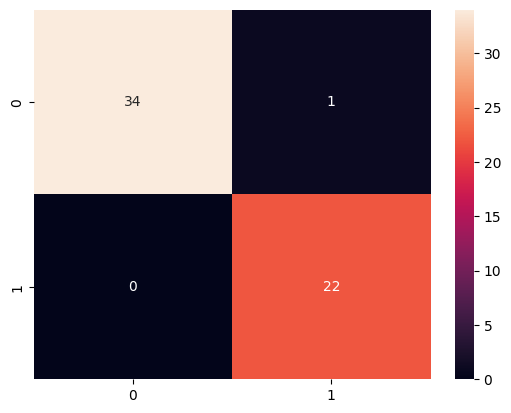

In [60]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')